In [18]:
from pathlib import Path
from tqdm import tqdm
import pickle

In [61]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [3]:
from kaldiio import ReadHelper
from pathlib import Path

In [4]:
root_dir = Path('ivectors')
new_root = Path('/home/jmilbaue/School/DL2021/cocktail/librispeech_data/ivectors/')

In [5]:
for f in tqdm(list(root_dir.glob('**/*.scp'))):
    with open(f) as fp:
        newlines = []
        for line in fp:
            a = line.split()[0]
            b = line.split()[1]
            b = Path(b)
            newB = new_root / b.parent.name / b.name
            newlines.append(f"{a} {newB}")
        with open(f, 'w') as fp:
            for line in newlines:
                fp.write(f"{line}\n")

100%|██████████| 2491/2491 [00:07<00:00, 334.66it/s]


In [15]:
utt2arr = {}
for f in tqdm(list(Path('ivectors/').glob('**/*.scp'))):
    with ReadHelper(f'scp:{f}') as reader:
        for key, nparr in reader:
            utt2arr[key] = nparr

100%|██████████| 2491/2491 [01:27<00:00, 28.50it/s]


In [37]:
utt2spk = pickle.load(open('utt2spk.pkl', 'rb'))

In [39]:
all_ivecs = []
utt2ivec = {}
for utt in tqdm(utt2arr):
    ivec = np.mean(utt2arr[utt], axis=0)
    utt2ivec[utt] = ivec
    all_ivecs.append(utt2arr[utt])

100%|██████████| 292371/292371 [00:03<00:00, 87722.76it/s]


In [46]:
spk2ivecs = {}
for utt in tqdm(utt2ivec):
    spk = utt2spk[utt]
    if spk not in spk2ivecs:
        spk2ivecs[spk] = []
    spk2ivecs[spk].append(utt2ivec[utt])

100%|██████████| 292371/292371 [00:00<00:00, 1022457.73it/s]


In [87]:
spk2ivec = {}
for spk in spk2ivecs:
    ivec = np.mean(spk2ivecs[spk], axis=0)
    spk2ivec[spk] = ivec

In [88]:
speaker_embs = np.vstack(list(spk2ivec.values()))

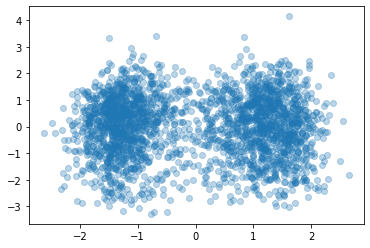

In [89]:
viz = PCA(n_components=2).fit_transform(speaker_embs)
plt.scatter(viz[:, 0], viz[:, 1], alpha=0.3)

In [43]:
ivecMTX = np.vstack(all_ivecs)

In [70]:
np.savez('ivec_mtx.npz', ivecMTX)